Student Details

### Name:  Garret Molloy

### ID:        9021906

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

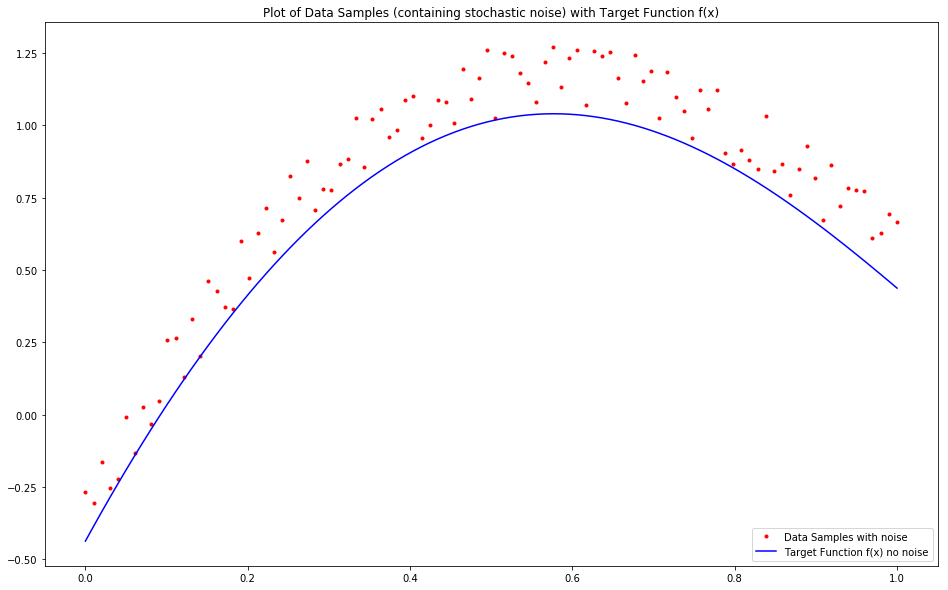

In [2]:
# target function f(x)
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.figure(figsize=(16,10))
plt.plot(X,y,'r.', label = "Data Samples with noise")
plt.plot(X,y_nf,'b-', label="Target Function f(x) no noise")
plt.title('Plot of Data Samples (containing stochastic noise) with Target Function f(x)')
plt.legend(loc="lower right")
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

## Task 4.1
Find the optimum regularization parameter, lambda &lambda;

In [7]:
# Method to create a list of lambdas
def create_lambdas():
    l1 = np.linspace(0, 0.00001, 100)
    l2 = np.linspace(0.00001, 0.0001,200)
    l3 = np.linspace(0.0001, 0.001, 200)
    l5 = np.linspace(0.001, 0.01, 400)
    l6 = np.linspace(0.01, 1, 100)
    return np.concatenate((l1,l2, l3,  l5,l6))


Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
# Train for all Lambdas

ein=[]
eout=[]
weights=[]
lambdas =  create_lambdas()
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.1, random_state=5, shuffle=True)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


## Find Best &lambda;

In [9]:
# Find the Best Lambda (where Eout is the smallest)
min_eout_index =  np.argmin(eout)
min_eout = eout[min_eout_index]
chosen_lambda = lambdas[min_eout_index]
print("Best Lamba = %0.8f  (Eout = %0.4f)   index=%d" % (chosen_lambda, min_eout, min_eout_index))


print("\nCompare this to our Eout for no regularization")
w = weights_reg(X_train,y_train,0)
eout_without_reg = calc_error(w,X_test,y_test)
print("Eout without Regularization = %0.4f" % eout_without_reg)

Best Lamba = 0.00738346  (Eout = 0.0707)   index=783

Compare this to our Eout for no regularization
Eout without Regularization = 0.7027


A huge imporvement on Eout with an optimum Lambda.


## Task 4.2
1. Plot Eout Versus Lambda &lambda;

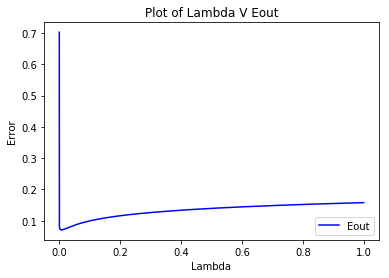

In [10]:
#plt.plot(lambdas, ein, label="Ein")
plt.plot(lambdas, eout, 'b-', label="Eout")
# plt.xlim([0.05, 1])
# plt.ylim([0.05, 1])
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Plot of Lambda V Eout')
plt.legend(loc="lower right")
plt.show()

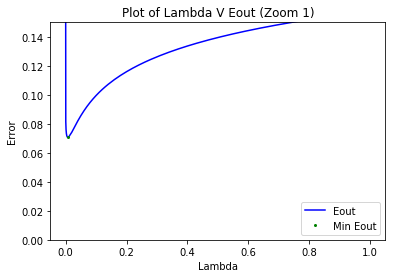

In [11]:
#plt.plot(lambdas, ein, label="Ein")
plt.plot(lambdas, eout, 'b-', label="Eout")
plt.plot(lambdas[min_eout_index], eout[min_eout_index],'g.', markersize=4, label="Min Eout")

# plt.xlim([0.05, 1])
plt.ylim([0, 0.15])
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Plot of Lambda V Eout (Zoom 1)')
plt.legend(loc="lower right")
plt.show()

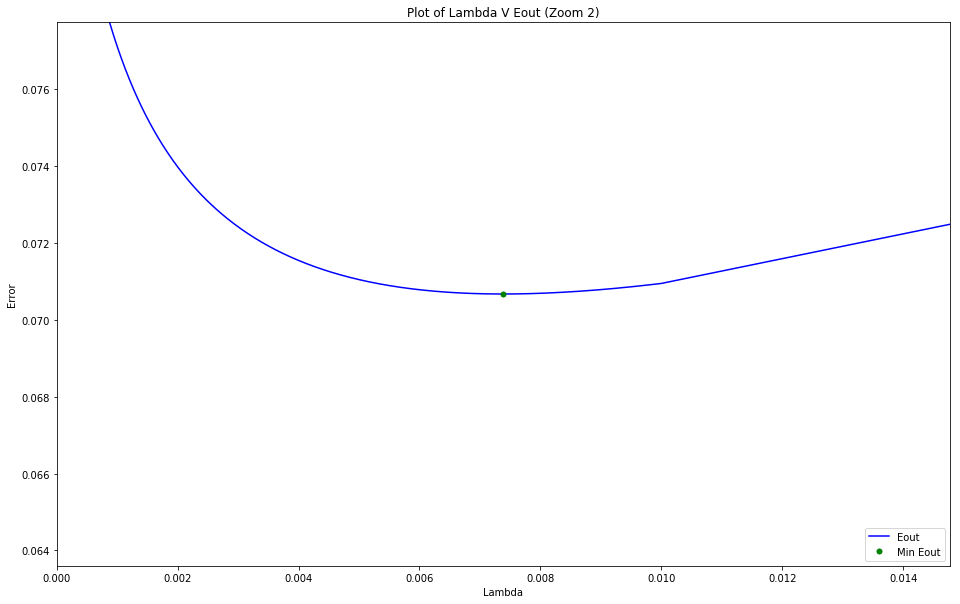

In [12]:
# Zoom in Plot
plt.figure(figsize=(16,10))
#plt.plot(lambdas, ein, 'r-', label="Ein")
plt.plot(lambdas, eout,'b-', label="Eout")
plt.plot(lambdas[min_eout_index], eout[min_eout_index],'g.', markersize=10, label="Min Eout")
# Chosen Lambda =     0.000008946 
plt.xlim([0, chosen_lambda*2])
plt.ylim([min_eout - (min_eout/10),min_eout + (min_eout/10)])
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Plot of Lambda V Eout (Zoom 2)')
plt.legend(loc="lower right")
plt.show()

In [13]:
print("Lambda = %d Eout = %0.5f index=0" % (lambdas[0],eout[0]))
print("Lambda = %0.5f Eout=%0.5f  index=%d" %(lambdas[500], eout[500],500))
print("Lambda = %0.5f Eout=%0.5f  index=%d" %(lambdas[800], eout[800],800))
print("Lambda = %0.5f Eout=%0.5f  index=%d" %(lambdas[950], eout[950],950))
print("Lambda = %0.5f Eout=%0.5f  index=%d" %(lambdas[999], eout[999],999))

print("\nBest Lamda = %0.9f Eout = %0.5f  index=%d" %(chosen_lambda, min_eout ,min_eout_index))

Lambda = 0 Eout = 0.70267 index=0
Lambda = 0.00100 Eout=0.07711  index=500
Lambda = 0.00777 Eout=0.07068  index=800
Lambda = 0.51000 Eout=0.14006  index=950
Lambda = 1.00000 Eout=0.15795  index=999

Best Lamda = 0.007383459 Eout = 0.07067  index=783


Plotting the Ein and Eout against the Lamba __&lambda;__.

We see Eout dropping rapidly for a tiny amount of Lambda and after the lowest point rise gradually.

Lambda is so small I have to zoom in a lot to see the inflection point and had to tailor my lambdas to have a wide range of tiny values at around that inflection point but still have the range from 0 - 1 to see the ful effect of lambda for larger values.

Eout steadies but at a higher error value, so we want to smaller lambda with the lowest Eout which was shown above, where Eout is the minimum for all our Lambdas.

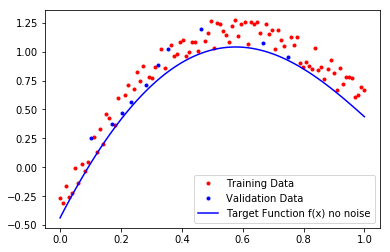

In [14]:
plt.plot(X_train[:,1],y_train,'r.', label="Training Data")
plt.plot(X_test[:,1],y_test,'b.', label="Validation Data")
plt.plot(X,y_nf,'b-', label="Target Function f(x) no noise")
plt.legend(loc="lower right")
plt.show()

In [15]:
# Explicitly Caculate the Root Mean Squared Error for predictions v actual

def calc_error_RMSE(predicted, actual):
    # Function to calculate the Mean squared error
    # Sum of (h(xn) - yn)**2 for all N samples / N
    sum = 0
    for hx, y in zip(predicted, actual):
        sum += ((hx - y)**2)
        # print(hx,y,((hx - y)**2),sum)
    #print("samples:", predicted.shape[0])
    mse = sum / predicted.shape[0]
    rmse = math.sqrt(mse)
    print("RMSE Error: {:0.5f}".format(rmse))
    return rmse

In [16]:
def plot_predictions(X, y, w, l, original_X, original_y, clf=True):
    if(isinstance(clf,int)):
        predictions=(lin_reg(w, X))
    else:
        predictions = clf.predict(X)
    
    rmse_eout = calc_error_RMSE(predictions,y)   
    
    # To be able to plot the Curve I ned to sort on X[1] (X[0] is the bias) 
    # I concatenate the list, sort on X[1] and split again
    X, predictions, y = zip(*sorted(zip(X, predictions, y), key=lambda x: x[0][1]))
    X = np.array(X) # so I can slice
    plt.plot(X[:,1], predictions, 'go-', label="Predicted")
    plt.plot(X[:,1], y,'ro-', label="Actual")
    plt.plot(original_X, original_y,'b-', label="Target Function f(x) no noise")
    plt.xlim([0, 1])
    plt.ylim([0,2.2])
    plt.title("Actual v Predicted using Lambda=%0.9f Eout=%0.5f" % (l,rmse_eout))
    plt.legend(loc="lower right")
    plt.show()
    
    return rmse_eout

### 1. Over Fitting Model

RMSE Error: 0.70267


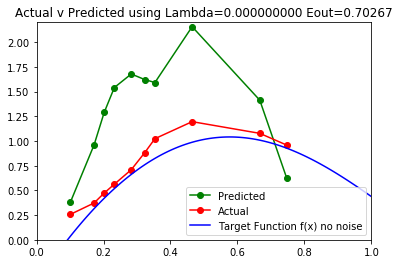

0.7026652680009966

In [17]:
plot_predictions(X_test, y_test, weights[0], lambdas[0], X, y_nf)

### 2. Under fitted model, where lambda is not helping and we have a larger Eout

RMSE Error: 0.15542


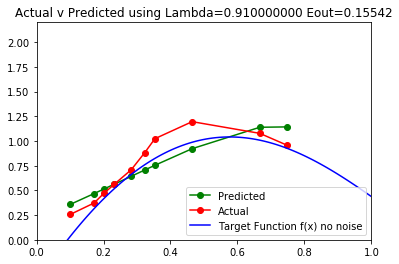

0.1554237987858126

In [18]:
plot_predictions(X_test, y_test, weights[990], lambdas[990], X, y_nf)

### 3. Just Right Model (Where Eout is at a minimum) Best Lambda

RMSE Error: 0.07067


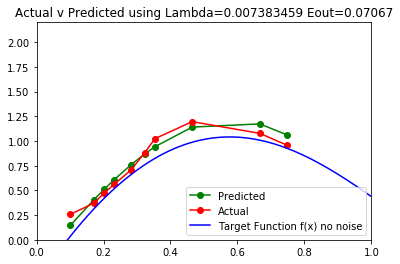

0.07066850750903256

In [19]:
plot_predictions(X_test, y_test, weights[min_eout_index], 
                 lambdas[min_eout_index], X, y_nf)

## Task 5 - 10 Fold Cross Validation
Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

In [20]:
# I am going to do KFOLD on the Training Data only, as I do not want to use Test Data 

# Train Test Split already shuffled the Data, regards less I have added Shuffle = True in KFOLD


In [21]:
kfold_eout_average=np.zeros(1000)
    
kf = KFold(n_splits=10,shuffle=True, random_state=5)
for train_index, test_index in kf.split(X_train, y_train):
    for i, l in enumerate(lambdas):    
        w = weights_reg(X_train[train_index],y_train[train_index],l)
        kfold_eout_average[i] += (calc_error(w,X_train[test_index],y_train[test_index])/10)

In [22]:
# Find the Best Lambda (where Eout Average for that Lambda is the smallest)
kfold_min_eout_index =  np.argmin(kfold_eout_average)
best_kfold_lambda = lambdas[kfold_min_eout_index]
print("KFOLD Best Lamba = %0.8f  (Eout Average = %0.3f)  index=%d" % (best_kfold_lambda, 
                                                                  kfold_eout_average[kfold_min_eout_index],
                                                                  kfold_min_eout_index))

KFOLD Best Lamba = 0.00096834  (Eout Average = 0.079)  index=492


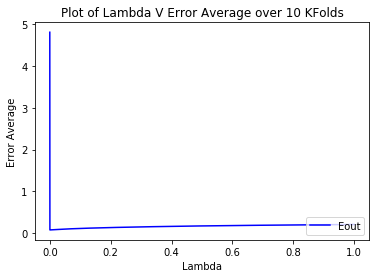

In [23]:
plt.plot(lambdas, kfold_eout_average, 'b-', label="Eout")
# plt.xlim([0.05, 1])
# plt.ylim([0.05, 1])
plt.xlabel('Lambda')
plt.ylabel('Error Average')
plt.title('Plot of Lambda V Error Average over 10 KFolds')
plt.legend(loc="lower right")
plt.show()

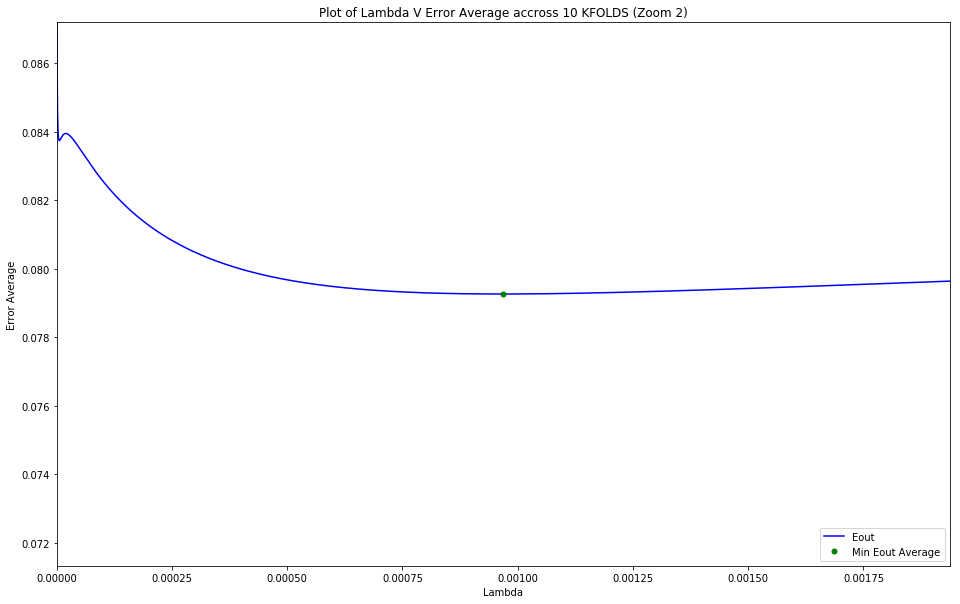

In [24]:
# Zoom in Plot
plt.figure(figsize=(16,10))
plt.plot(lambdas, kfold_eout_average,'b-', label="Eout")
plt.plot(lambdas[kfold_min_eout_index], kfold_eout_average[kfold_min_eout_index],'g.', markersize=10, label="Min Eout Average")
# Chosen Lambda =     0.000008946 
plt.xlim([0, lambdas[kfold_min_eout_index]*2])
plt.ylim([ kfold_eout_average[kfold_min_eout_index] - ( kfold_eout_average[kfold_min_eout_index]/10), 
          kfold_eout_average[kfold_min_eout_index] + ( kfold_eout_average[kfold_min_eout_index]/10)])
plt.xlabel('Lambda')
plt.ylabel('Error Average')
plt.title('Plot of Lambda V Error Average accross 10 KFOLDS (Zoom 2)')
plt.legend(loc="lower right")
plt.show()

### Plot for (Where Eout is at a minimum) Best Lambda using  KFOLD

RMSE Error: 0.07726


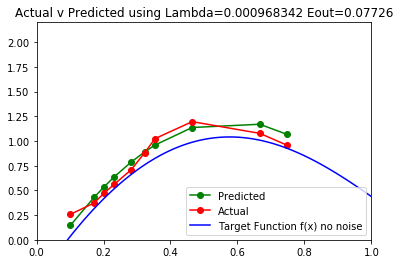

KFOLD Eout = 0.07726   KFOLD Lambda = 0.000968
Compared to original method:
 Best Eout = 0.07067    Best Lambda = 0.007383


In [25]:
kfold_w = weights_reg(X_train,y_train,best_kfold_lambda)
this_eout = calc_error(kfold_w,X_test,y_test)
kfold_rmse_eout = plot_predictions(X_test, y_test, kfold_w, best_kfold_lambda, X, y_nf)
print("KFOLD Eout = %0.5f   KFOLD Lambda = %0.6f\nCompared to original method:" % (this_eout, best_kfold_lambda))
print(" Best Eout = %0.5f    Best Lambda = %0.6f" % (min_eout, chosen_lambda))

A Large improvement using KFOLDS to detect a better Lambda producing a smaller error.

## Task 6
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum &lambda; using the same transformed data (i.e. features up to 50th order).
- Observe the resulting Eout, and &lambda; compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?


In [26]:
def create_lasso_lambdas():
    l1 = np.linspace(0.00001, 0.1, 1000)
    l6 = np.linspace(0.1, 1, 100)
    return np.concatenate((l1, l6))

### Lasso CV

In [27]:
my_alphas = create_lasso_lambdas()
lasso = LassoCV(alphas=my_alphas,cv=10, max_iter=100000)

In [28]:
lasso

LassoCV(alphas=array([1.00000e-05, 1.10090e-04, ..., 9.90909e-01, 1.00000e+00]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [ ]:
l_model = lasso.fit(X_train, y_train)

In [ ]:
l_score = l_model.score(X_test,y_test)
print("Lasso Score: %0.4f" % (l_score))

print("Lasso Chosen Lambda: %0.6f" % (l_model.alpha_))

l_rmse_eout = plot_predictions(X_test, y_test, l_model.coef_, l_model.alpha_,  X, y_nf, l_model)


### Ridge CV

In [ ]:
ridge = RidgeCV(alphas=my_alphas, cv=10)

In [ ]:
ridge

In [ ]:
r_model = ridge.fit(X_train, y_train)

In [ ]:
r_score = r_model.score(X_test, y_test)
print("Ridge Score: %0.4f" % (r_score))

print("Ridge Chosen Lambda: %0.6f" % (r_model.alpha_))

r_rmse_eout = plot_predictions(X_test, y_test, r_model.coef_, r_model.alpha_, X, y_nf, r_model)


## Compare Weights Chosen by Lasso & Ridge

In [ ]:
l_model.coef_

In [ ]:
r_model.coef_

### Comment on Weights chosen by Lasso & Ridge

Despite chosing the same Lambda as optimal and performing quite similarily. (change recent runs have seen different Lambdas for Ridge and Lasso)

The weigths chosen are dramatically different.

Lasso sends the weights of some features to 0 to remove them from the prediction and results in a simpler model, whereas Ridge has positive and negative values for the various features.

In [ ]:
# Copmarison

# Original Method (Best Lambda)
print("Live Results:\n")
print("No Regularization\tEout = %0.4f\tLambda = %0.6f" % (eout_without_reg, 0))
print("Best Lambda\t\tEout = %0.4f\tLambda = %0.6f" % (min_eout, chosen_lambda))
print("Best Lambda KFOLD\tEout = %0.4f\tLambda = %0.6f" % (kfold_rmse_eout, best_kfold_lambda))
print("Best Lambda Lassoo\tEout = %0.4f\tLambda = %0.6f" % (l_rmse_eout, l_model.alpha_))
print("Best Lambda Ridge\tEout = %0.4f\tLambda = %0.6f" % (r_rmse_eout, r_model.alpha_))


Interestingly both Ridge and Lasso have identical chosen Lambda Values.
I used the weights from the Ridge and Lasso models to calculate a comparative Eout with calc_error() method but this seems quite high


## Comparison of Methods

<table>
    <tr><td><b>Method</b></td><td><b>Lambda</b></td>
        <td><b>Eout</b></td><td><b>Score</b></td></tr>
    <tr><td>No Regularization</td><td>0</td>
        <td>0.5949</td><td></td></tr>
    <tr><td>Best Lambda<br/>Minium Eout for all Lambdas</td>
        <td>0.000068</td><td>0.0978</td><td></td></tr>
    <tr><td>Best Lambda<br/>
        Using KFOLDS</td><td>0.000787</td>
        <td>0.0669</td><td></td></tr>
    <tr><td>Lasso CV</td><td>0.000010</td>
        <td>0.3205</td><td>0.8799</td></tr>
    <tr><td>Ridge CV</td><td>0.000010</td>
        <td>0.3287</td><td>0.8768</td></tr>
</table>

* Previously recorded scores - may vary with live data